In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as cnt
from scipy.integrate import quad

In [3]:
cd

C:\Users\ksb99


In [118]:
#import data frame
ds = pd.read_excel("Downloads/Sp heat data.xlsx").replace("--", " ")
ds = ds[:48]

In [119]:
temp = ds["Temperature (K)"]

sp_ht = ds["Specific Heat Cp (mJ/g-K)"]
sp_ht = sp_ht * 1e-3 * 200.21


Text(0, 0.5, 'Specific Heat $C_p\\, (J/g-K) $')

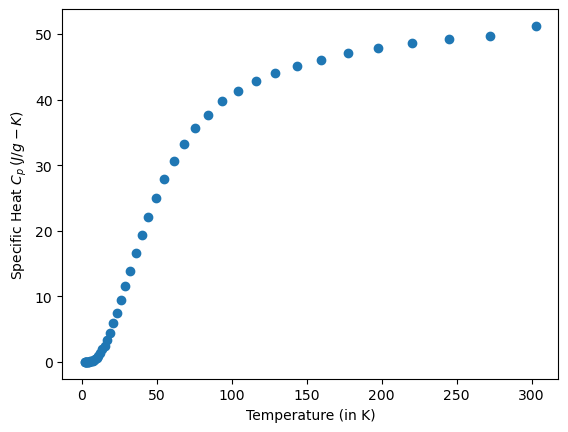

In [120]:
plt.scatter(temp, sp_ht)
plt.xlabel("Temperature (in K)")
plt.ylabel("Specific Heat $C_p\, (J/g-K) $")


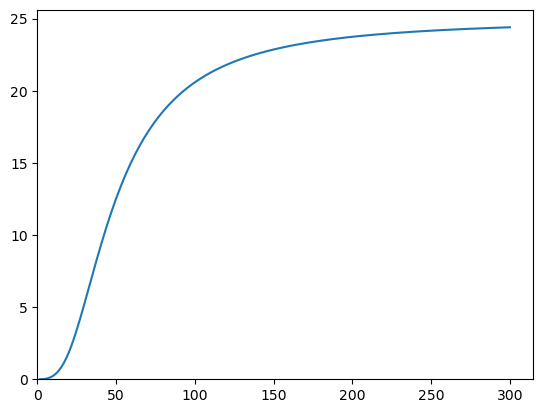

In [131]:
# to check whether the function is runnig properly
plt.plot(t, c)
plt.xlim(0)
plt.ylim(0)
plt.show()

In [149]:
curve_fit(cv, temp, sp_ht)

(array([ 1.63941674e+02, -3.17788796e-03]),
 array([[ 4.04006611e+19, -7.82783923e+14],
        [-7.82783923e+14,  1.51668480e+10]]))

In [145]:
# curve fitting starts here

sp = []
for i in temp:
    sp.append(curve_fit(cv, sp_ht, temp))
    
len(sp[0])

2

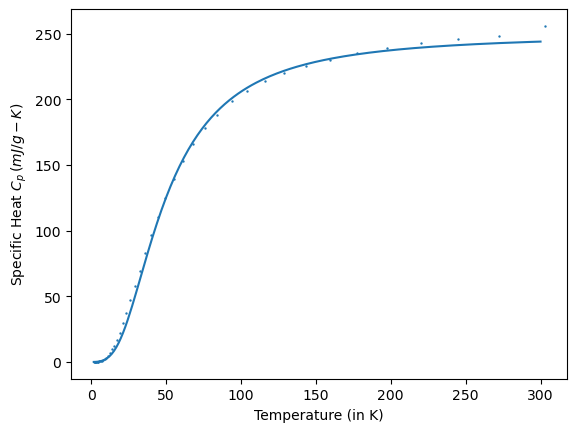

In [140]:
plt.scatter(temp, sp_ht, s=0.5)
plt.xlabel("Temperature (in K)")
plt.ylabel("Specific Heat $C_p\, (mJ/g-K) $")
plt.plot(t, np.asarray(c)*10)

In [101]:
# defining the function for integration
def integrand(y):
    return (y**4 * np.exp(y) / (np.exp(y) - 1)**2)

def C_v(temperature, theta_d):
    a = theta_d / temperature
    result, _ = quad(integrand, 0, a)
    return (9 * cnt.R * result / a**3)

In [102]:
C_v(temperature=300, theta_d=170)

24.54745560669017

C:\Users\ksb99\AppData\Local\Temp\ipykernel_15744\3247946936.py:7: RuntimeWarning: overflow encountered in exp
  return (y**4 * np.exp(y) / (np.exp(y) - 1)**2)
C:\Users\ksb99\AppData\Local\Temp\ipykernel_15744\3247946936.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return (y**4 * np.exp(y) / (np.exp(y) - 1)**2)
C:\Users\ksb99\AppData\Local\Temp\ipykernel_15744\3247946936.py:7: RuntimeWarning: overflow encountered in scalar power
  return (y**4 * np.exp(y) / (np.exp(y) - 1)**2)
C:\Users\ksb99\AppData\Local\Temp\ipykernel_15744\3247946936.py:7: RuntimeWarning: overflow encountered in scalar multiply
  return (y**4 * np.exp(y) / (np.exp(y) - 1)**2)
C:\Users\ksb99\AppData\Local\Temp\ipykernel_15744\3247946936.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result[i], _ = quad(integrand, 0, a, args=(temp_, theta_d))


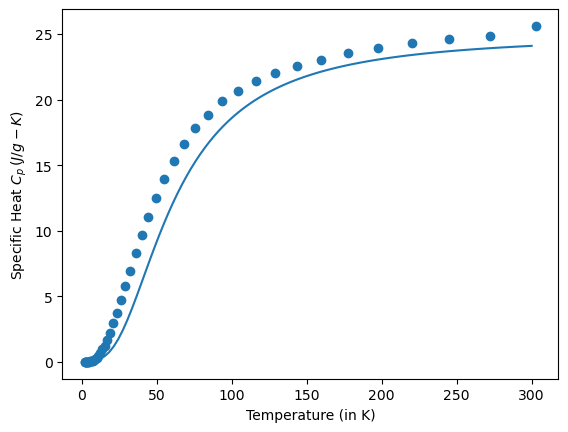

In [156]:
x = np.linspace(0.1, 300, 100)
plt.plot(x, C_v(x, 250))
plt.scatter(temp, sp_ht/2)
plt.xlabel("Temperature (in K)")
plt.ylabel("Specific Heat $C_p\, (J/g-K) $")
plt.show()

In [99]:
from scipy.optimize import curve_fit
g = np.asarray(temp)
h = np.asarray(sp_ht)

curve_fit(C_v, g, h, p0 = [200], maxfev=10000)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [164]:
# Defining the function for integration
def integrand(y, temperature, theta_d):
    return (y**4 * np.exp(y) / (np.exp(y) - 1)**2)

def C_v(temperature, theta_d):
    result = np.zeros_like(temperature)  # Initialize an array for results
    for i, temp_ in enumerate(temperature):
        a = theta_d / temp_
        result[i], _ = quad(integrand, 0, a, args=(temp_, theta_d))
        result[i] = result[i] * 9 * 8.314 / a**3
    return (result)

# Example data (replace this with your actual data)
g = temp.values
h = sp_ht.values /2

# You can use p0=[200] as an initial guess for the parameter
params, params_covariance = curve_fit(C_v, g, h, p0=[200], maxfev=10000)
print(params)


[195.05139402]


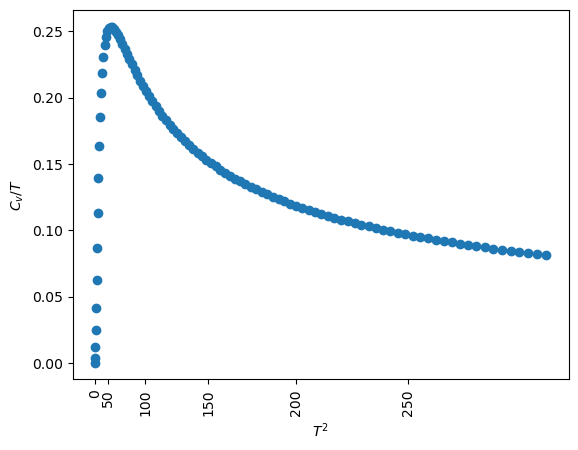

In [212]:
x = np.linspace(1 ,300, 100)
u = np.arange(0, 300, 50)
plt.scatter(x**2, C_v(x, 200)/x)
plt.xticks(u**2, [round(k) for k in u], minor=False, rotation=90)
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("$T^2$")
plt.ylabel("$C_v/T$")
plt.show()

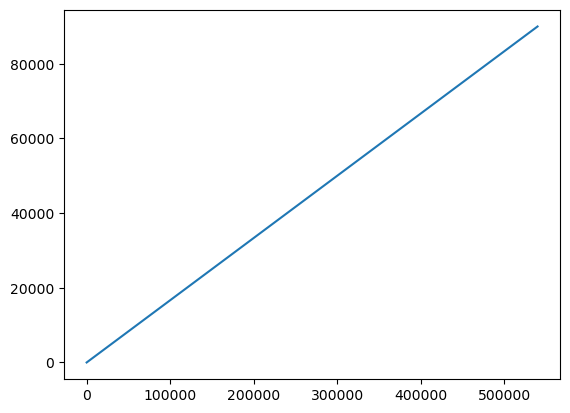

In [183]:
v = 3*x + 6*x**3
plt.plot(v/x, x**2)